In [13]:
import sys
sys.path.insert(0, '/home/ubuntu/miniconda3/lib/python3.5/site-packages')

%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import json

w = open('./AviationData.txt')
states_json = open('./states_json.json')
states_json = json.load(states_json)
# list of lists
aviation_list = []
for st in w:
    aviation_list.append(st.split(" | "))
    
# list of strings    
lax_codes = []
for i,event in enumerate(aviation_list):
    if i>0:
        lax_codes.append(event[0])

# list of hashes
aviation_list_of_dict=[]
aviation_dict = {}
attributes=aviation_list[0]

for i,event in enumerate(aviation_list[1:]):
    for attr_i,attr in enumerate(attributes):
        if(attr_i>len(event)-1):
            aviation_dict[attr]=''
        else:
            aviation_dict[attr]=event[attr_i]
    aviation_list_of_dict.append(aviation_dict)
    aviation_dict={}
incidents_df =  pd.DataFrame(aviation_list_of_dict)


In [36]:
## order the states by number of aviation accidents
incidents_df['state'] = incidents_df['Location'].apply(lambda x: x.split(', ')[1] if len(x.split(', '))>1 else x)
counts_by_area = incidents_df['state'].value_counts()

counts_by_area_df = pd.DataFrame({'state':counts_by_area.index, 'count':counts_by_area.values})
## California Texas and Florida have the top three most incidents for problems to occur in an airport

counts_by_area_df = counts_by_area_df[counts_by_area_df['state'].str.len() == 2]
counts_by_area_df['state'] = counts_by_area_df['state'].apply(lambda x: states_json[x] if x in states_json else x)
counts_by_area_df = counts_by_area_df.set_index(['state'])
counts_by_area_df.loc['California']['count']


66

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


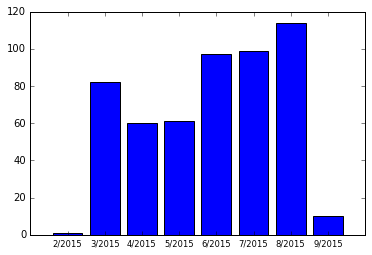

In [104]:
## plot the total number of seriius injures and fatalities for a given month


incidents_df['Event Date'] = pd.to_datetime(incidents_df['Event Date'])
incidents_df = incidents_df.sort('Event Date')
incidents_df['Month/Year'] = incidents_df['Event Date'].apply(lambda x: "%d/%d" % (x.month, x.year))
incidents_df[['Total Serious Injuries','Total Fatal Injuries']] = incidents_df[['Total Serious Injuries','Total Fatal Injuries']].replace(to_replace='', value='0').astype(int)
incidents_df['fatalities/injuries total'] = incidents_df['Total Fatal Injuries']+incidents_df['Total Serious Injuries']

physical_harm = incidents_df.groupby(['Month/Year'])['fatalities/injuries total'].sum()



plt.bar(range(len(physical_harm)), physical_harm.values, align='center')
plt.xticks(range(len(physical_harm)), physical_harm.index.values, size='small')
plt.show()

# this plot shows the summer months of the most fatal and dangerous incidents with a peak in number 
# of people hurt or killed in August

In [106]:
# Basemap tutorialhttps://www.packtpub.com/books/content/plotting-geographical-data-using-basemap
# example on highlighting states - http://osdir.com/ml/python.matplotlib.general/2005-10/msg00029.html
# example on highlighting countries - http://stackoverflow.com/questions/13397022/fill-countries-in-python-basemap
# http://ramiro.org/notebook/basemap-choropleth/

dict_keys(['SUB_REGION', 'STATE_ABBR', 'RINGNUM', 'SHAPENUM', 'STATE_NAME', 'STATE_FIPS', 'DRAWSEQ'])
4
4
4
4
4
4
4
22
22
22
14
2
2
4
7
9
18
18
20
1
11
16
4
10
4
4
4
3
20
20
20
20
21
6
2
2
2
10
7
14
17
66
66
66
66
66
11
18
1
10
10
10
10
15
7
7
12
11
11
11
20
23
12
23
23
23
23
23
23
16
59
59
59
59
59
59
11
14
7
16
16
8
8
15
12
12
12
12
53
53
53
53
53
53
53
17
17
17
17
17
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45


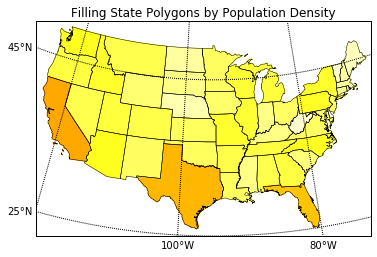

In [43]:
# http://brandonrose.org/pythonmap#Loading-in-the-shapefile - instructions

# example
# https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('states','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# popdensity = {
# 'New Jersey':  438.00,
# 'Rhode Island':   387.35,
# 'Massachusetts':   312.68,
# 'Connecticut':	  271.40,
# 'Maryland':   209.23,
# 'New York':    155.18,
# 'Delaware':    154.87,
# 'Florida':     114.43,
# 'Ohio':	 107.05,
# 'Pennsylvania':	 105.80,
# 'Illinois':    86.27,
# 'California':  83.85,
# 'Hawaii':  72.83,
# 'Virginia':    69.03,
# 'Michigan':    67.55,
# 'Indiana':    65.46,
# 'North Carolina':  63.80,
# 'Georgia':     54.59,
# 'Tennessee':   53.29,
# 'New Hampshire':   53.20,
# 'South Carolina':  51.45,
# 'Louisiana':   39.61,
# 'Kentucky':   39.28,
# 'Wisconsin':  38.13,
# 'Washington':  34.20,
# 'Alabama':     33.84,
# 'Missouri':    31.36,
# 'Texas':   30.75,
# 'West Virginia':   29.00,
# 'Vermont':     25.41,
# 'Minnesota':  23.86,
# 'Mississippi':	 23.42,
# 'Iowa':	 20.22,
# 'Arkansas':    19.82,
# 'Oklahoma':    19.40,
# 'Arizona':     17.43,
# 'Colorado':    16.01,
# 'Maine':  15.95,
# 'Oregon':  13.76,
# 'Kansas':  12.69,
# 'Utah':	 10.50,
# 'Nebraska':    8.60,
# 'Nevada':  7.03,
# 'Idaho':   6.04,
# 'New Mexico':  5.79,
# 'South Dakota':	 3.84,
# 'North Dakota':	 3.59,
# 'Montana':     2.39,
# 'Wyoming':      1.96,
# 'Alaska':     0.42}
# print(shp_info)
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
print(m.states_info[0].keys())
for shapedict in m.states_info:

    statename = shapedict['STATE_NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Delaware']:
        pop = counts_by_area_df.loc[statename]['count']#popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Delaware']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Filling State Polygons by Population Density')
plt.show()


(51, 5, [-178.21759836236586, 18.92178634508703, 0.0, 0.0], [-66.96927125875777, 71.40623539396698, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x7f99a04eb9b0>)
dict_keys(['SHAPENUM', 'STATE_FIPS', 'SUB_REGION', 'RINGNUM', 'STATE_NAME', 'DRAWSEQ', 'STATE_ABBR'])


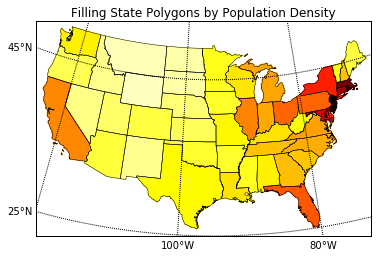